In [1]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")
# remove NaN column
raw_data = raw_data.iloc[:,:-1]
# change 'diagnosis' column values to 1 or 0
raw_data['diagnosis'] = raw_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
# change 'id' column to index
raw_data = raw_data.set_index('id')

# assign X, y data set and split to training and testing data sets
y = raw_data['diagnosis']
X = raw_data.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [3]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train_scaled, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.987
The accuracy on the testing subset: 0.977


In [5]:
# clf_rf_1 = RandomForestClassifier()      
# clr_rf_1 = clf_rf_1.fit(X_train_scaled,y_train)
# importances = clr_rf_1.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf_rf_1.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X_train_scaled.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest

# plt.figure(1, figsize=(14, 13))
# plt.title("Feature importances")
# plt.bar(range(X_train_scaled.shape[1]), importances[indices],
#        color="g", yerr=std[indices], align="center")
# plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices],rotation=90)
# plt.xlim([-1, X_train_scaled.shape[1]])
# plt.show()

In [6]:
# clf_rf_2 = RandomForestClassifier()      
# clr_rf_2 = clf_rf_2.fit(X_train,y_train)
# importances = clr_rf_2.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf_rf_2.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest

# plt.figure(1, figsize=(14, 13))
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices],
#        color="g", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()

In [7]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


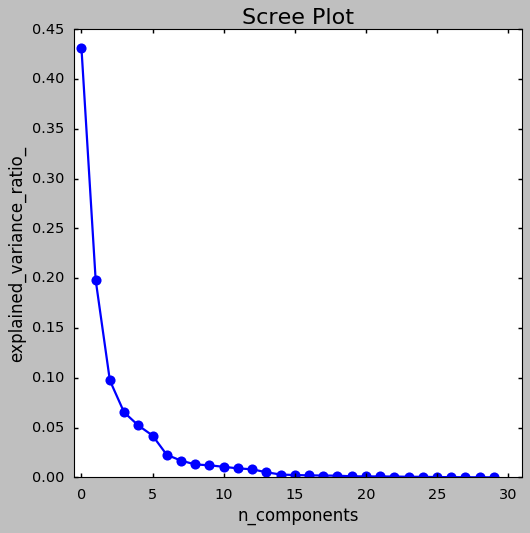

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

plt.style.use(['classic','seaborn-talk'])
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2, marker='o')
plt.axis('tight')
plt.xlabel('n_components', fontsize = 15)
plt.ylabel('explained_variance_ratio_', fontsize = 15)
plt.title('Scree Plot', fontsize = 20)
plt.ylim(0, 0.45)
plt.xlim(-0.5, 31)
plt.savefig('scree.png')
plt.show()

In [9]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf, y_train['diagnosis']], axis = 1)

In [10]:
diag = pd.DataFrame(y_train)
diag.reset_index(inplace=True, drop=True)

In [11]:
finalDf = pd.concat([principalDf, diag['diagnosis']], axis = 1)

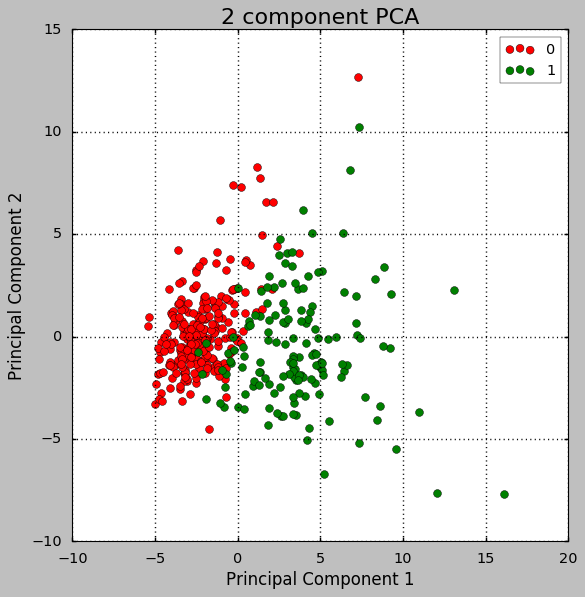

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('PCA.png')
plt.show()

In [13]:
df = pd.DataFrame(pca.components_, columns=list(X_train.columns))

In [14]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.216927,0.106841,0.226026,0.219594,0.141974,0.238731,0.260357,0.263648,0.148065,0.058694,...,0.226308,0.107381,0.236046,0.223943,0.125357,0.207062,0.232988,0.252293,0.122468,0.125055
1,-0.237700,-0.044474,-0.220103,-0.233867,0.179887,0.158836,0.059628,-0.037974,0.179719,0.360696,...,-0.223346,-0.032596,-0.203184,-0.221855,0.170141,0.153409,0.098852,-0.002558,0.121710,0.284607


In [15]:
sorted_df = df.sort_values(0, axis=1, ascending=False)

In [16]:
sorted_df

,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,...,smoothness_worst,fractal_dimension_worst,symmetry_worst,texture_worst,texture_mean,fractal_dimension_se,fractal_dimension_mean,symmetry_se,texture_se,smoothness_se
0,0.263648,0.260357,0.252293,0.238731,0.236046,0.232988,0.226308,0.226026,0.223943,0.219594,...,0.125357,0.125055,0.122468,0.107381,0.106841,0.103207,0.058694,0.054037,0.036470,0.025936
1,-0.037974,0.059628,-0.002558,0.158836,-0.203184,0.098852,-0.223346,-0.220103,-0.221855,-0.233867,...,0.170141,0.284607,0.121710,-0.032596,-0.044474,0.282869,0.360696,0.157459,0.099439,0.197475


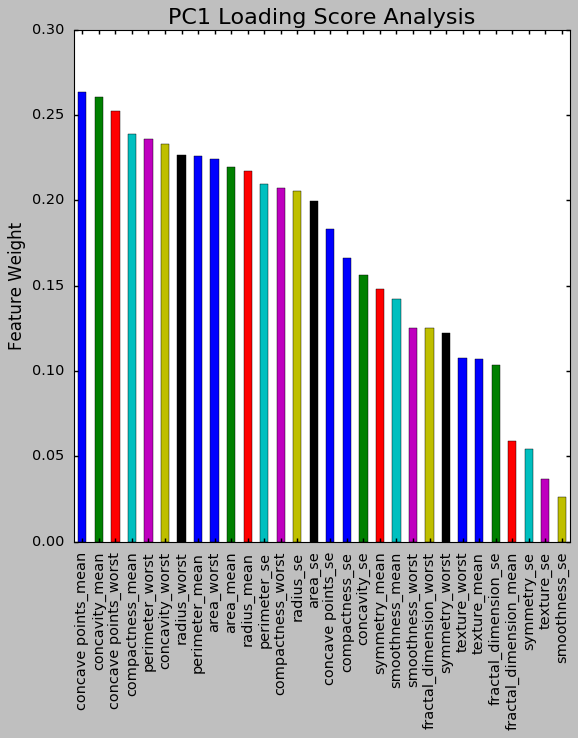

In [17]:
row = sorted_df.iloc[0]
row.plot(kind='bar', figsize = (8,8))
# ax.set_xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Feature Weight', fontsize = 15)
plt.title('PC1 Loading Score Analysis', fontsize = 20)
plt.savefig('loading.png')
plt.show()

In [18]:
def acc_evaluation_feature(N):
    sel_feature = list(sorted_df.columns)[0:N]
    feature_X = raw_data[sel_feature]
    y = raw_data['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(feature_X, y, test_size = 0.30, random_state=42)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svm_model = SVC()
    svm_model.fit(X_train_scaled, y_train)
    acc_train = svm_model.score(X_train_scaled, y_train)
    acc_test = svm_model.score(X_test_scaled, y_test)
    return acc_train, acc_test

In [19]:
acc_train_change = []
acc_test_change = []
for i in range(1, 31):
    acc_train, acc_test = acc_evaluation_feature(i)
    acc_train_change.append(acc_train)
    acc_test_change.append(acc_test)

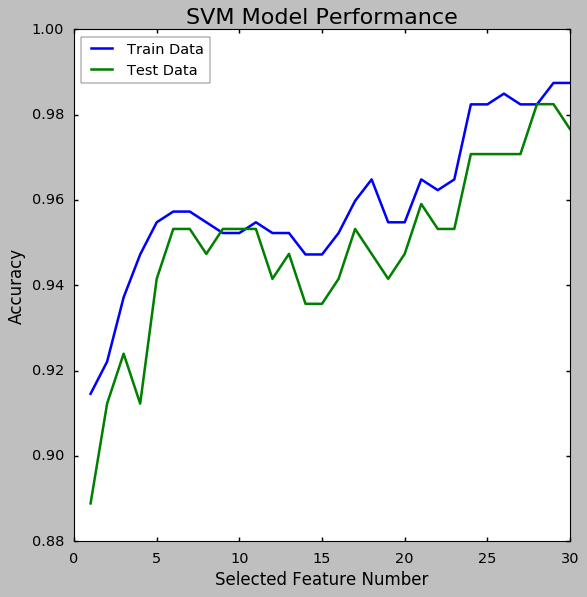

In [20]:
X_axis = list(range(1,31))
fig = plt.figure(figsize = (8,8))
plt.plot(X_axis, acc_train_change)
plt.plot(X_axis, acc_test_change)
plt.legend(['Train Data', 'Test Data'], loc='upper left')
plt.xlabel('Selected Feature Number', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('SVM Model Performance', fontsize = 20)
plt.savefig('SVMperformance.png')
plt.show()